In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
from scipy import stats

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/LauraCD2/estadisticos/refs/heads/main/2023_nba_player_stats.csv')

In [ ]:
df.shape

(539, 30)

Limipiamos los valores NaN

In [ ]:
df['POS'] = df['POS'].fillna('PF')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PName   539 non-null    object 
 1   POS     539 non-null    object 
 2   Team    539 non-null    object 
 3   Age     539 non-null    int64  
 4   GP      539 non-null    int64  
 5   W       539 non-null    int64  
 6   L       539 non-null    int64  
 7   Min     539 non-null    float64
 8   PTS     539 non-null    int64  
 9   FGM     539 non-null    int64  
 10  FGA     539 non-null    int64  
 11  FG%     539 non-null    float64
 12  3PM     539 non-null    int64  
 13  3PA     539 non-null    int64  
 14  3P%     539 non-null    float64
 15  FTM     539 non-null    int64  
 16  FTA     539 non-null    int64  
 17  FT%     539 non-null    float64
 18  OREB    539 non-null    int64  
 19  DREB    539 non-null    int64  
 20  REB     539 non-null    int64  
 21  AST     539 non-null    int64  
 22  TO

<Axes: >

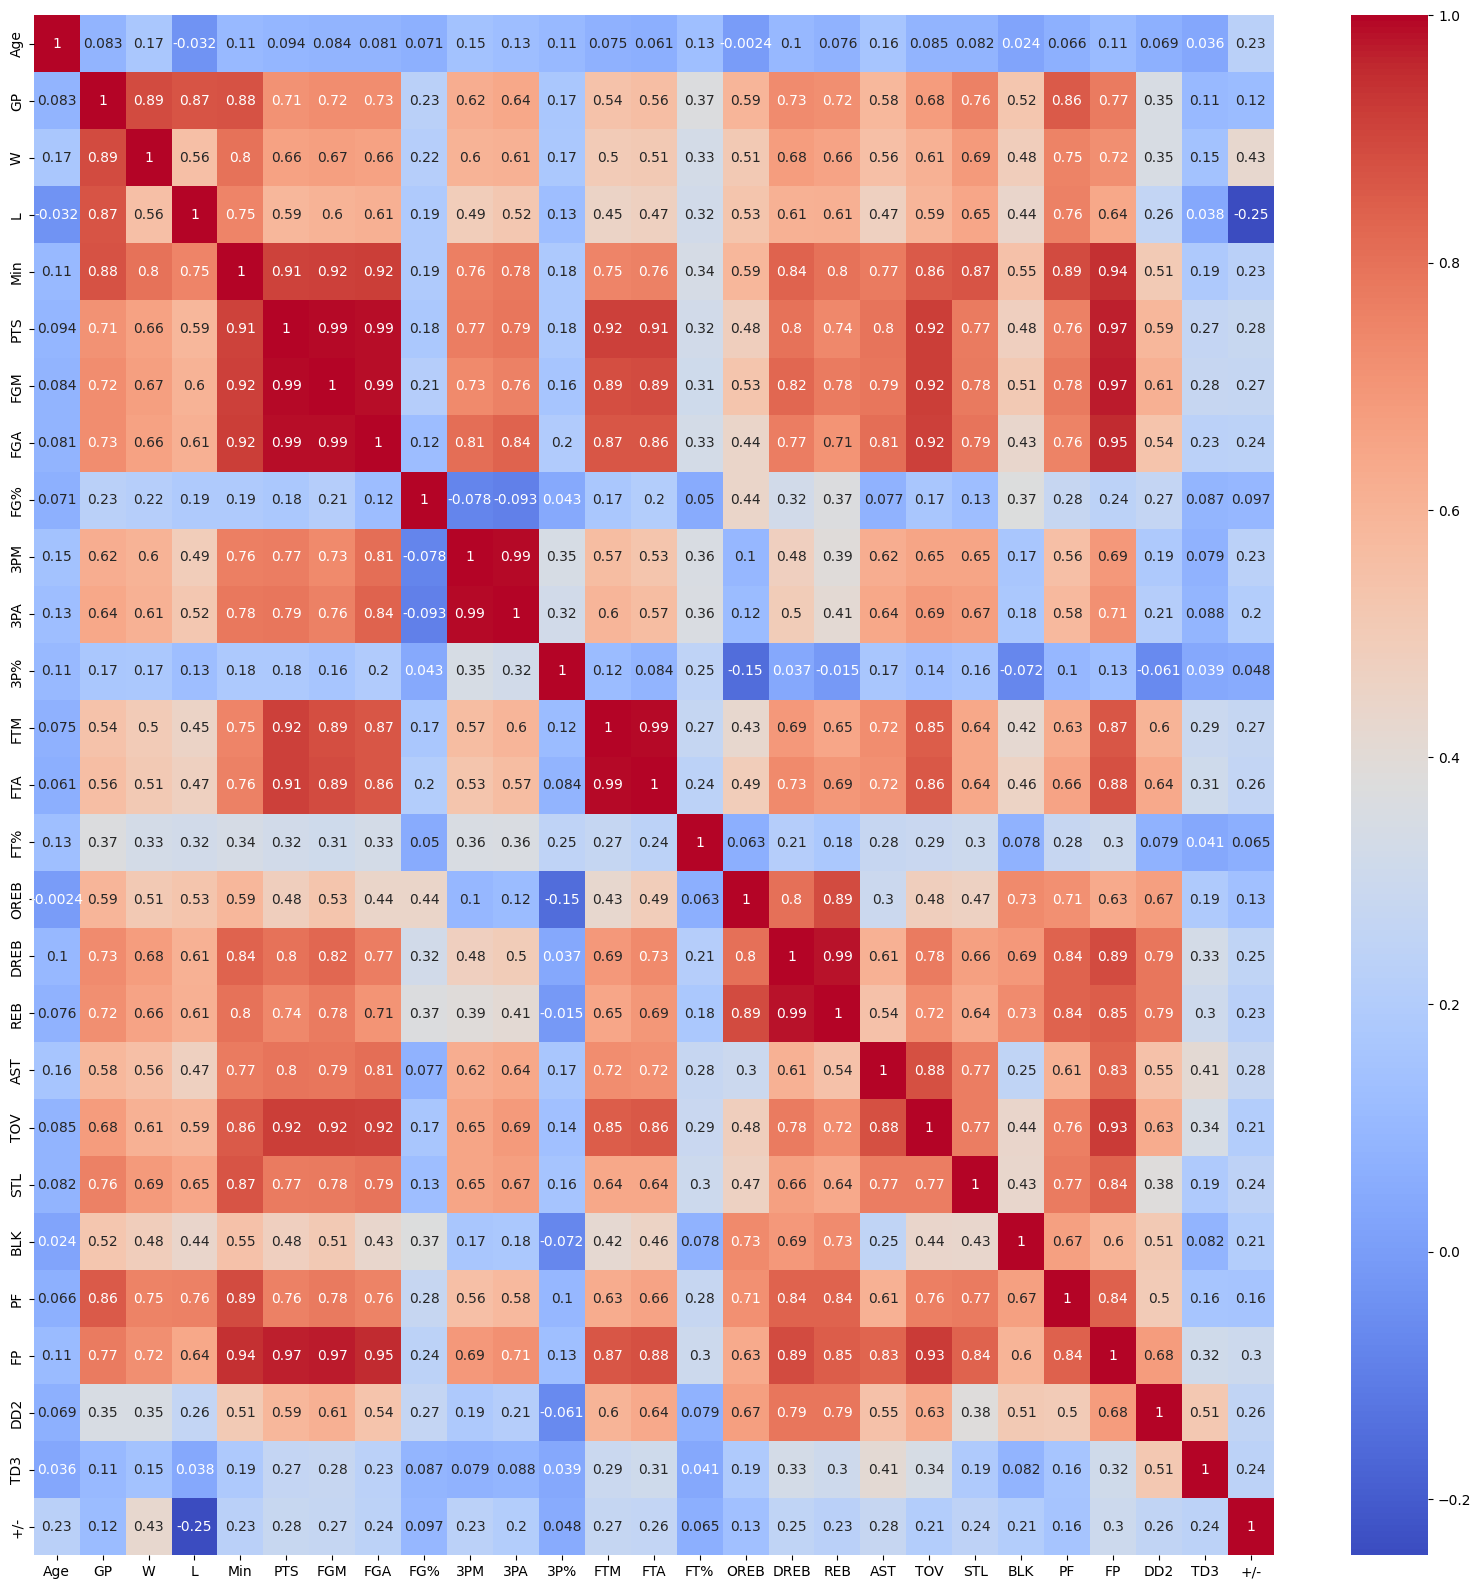

In [ ]:
corr_mat = df.iloc[:,3:].corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_mat, annot=True, cmap="coolwarm")

## Regresión lineal simple

 $$y = \beta_0 + \beta_1x + \epsilon$$


**Método de mínimos cuadrados**.

Las estimaciones de mínimos cuadrados de la pendiente y el punto de corte con el eje y del modelo de regresión lineal simple son

$$\hat{\beta_0}= \bar{y} - \hat{\beta_1} \bar{x}$$

$$\hat{\beta_1}= \dfrac{\sum_1^n y_i x_i-\dfrac{(\sum_1^n y_i)(\sum_1^n x_i)}{n}}{\sum_1^n x_i^2-\dfrac{(\sum_1^n x_i)^2}{n}}$$

donde $\bar{y}= (1/n)\sum_1^n y_i$ y $\bar{x}= (1/n)\sum_1^n x_i$.

Las fórmulas de cálculo para el numerador y denominador de la expresión anterior podemos expresarlas de la siguiente manera:

$$\beta_1 = \dfrac{S_{XY}}{S_{XX}}$$

$$ S_{XY}= \sum_1^n y_i (x_i - \bar{x}) = \sum_1^n x_i y_i - \dfrac{(\sum_1^n y_i)(\sum_1^n x_i)}{n} $$ y $$S_{XX} = \sum_1^n (x_i - \bar{x})^2 = \sum_1^n x_i^2 - \dfrac{(\sum_1^n x_i)^2}{n} $$

# Estimación de $\sigma^2$

$\sigma^2$ determina la cantidad de variabilidad, es decir, la variación aleatoria alrededor de la verdadera recta de regresión. Para valores grandes de $\sigma^2$ los puntos observados están bastante dispersos en torno a la línea de regresión verdadera, mientras que para valores pequeños de $\sigma^2$ los puntos observados tenderán a quedar cerca de la línea verdadera.

Usaremos los **residuales** para calcular la estimación de $\sigma^2$, estos son las desviaciones verticales con respecto a la línea estimada, es decir, la diferencia entre la $y_i$ observada y la $\hat{y_i }$ estimada: $e_i= y_i - \hat{y_i }$ con $i= 1, 2, ..., n$.

**La suma de los cuadrados de los residuales** es

$$ SS_E = SC_E = \sum_1^n e_i^2 = \sum (y_i - \hat{y_i })^2 $$

El cálculo de SSE con la fórmula definitoria implica mucha aritmética porque primero se deben calcular los valores pronosticados y residuos. Una forma más conveniente para calcular *SSE* sería:

$$ SS_E = \sum[y_i- (\hat{\beta_0} + \hat{\beta_1}x_1)]^2 = \sum y_i^2 - \hat{\beta_0 }\sum y_i - \hat{\beta_1 }\sum x_iy_i $$


y **la estimación de $\hat{\sigma}^2$** es

$$ \hat{\sigma}^2 = s^2 = \dfrac{SS_E}{n-2}. $$

In [ ]:
x_column = 'Min'
y_column = 'PTS'

In [ ]:
def reg3(x, y):
  # algunos valores
  n = np.size(x)
  sum_xy = np.sum(x * y)
  sum_x = np.sum(x)
  sum_y = np.sum(y)
  sum_x2 = np.sum(x ** 2)
  x_barra = np.sum(x) / n
  y_barra = np.sum(y) / n
  SXY = sum_xy - (sum_y * sum(x)) / (n)
  SXX = sum_x2 - (sum_x ** 2) / (n)

  # coeficientes y recta
  B1 = SXY / SXX
  B0 = y_barra - B1 * x_barra
  y_estimados = B0 + B1 * x  # grafica

  # Calcular SSE
  SSE = np.sum(y**2) - B0*np.sum(y) - B1*np.sum(x*y)

  # Sigma 2
  sigma2 = SSE/(n-2)
  sigma = np.sqrt(sigma2)

  print('Mi recta de regresión es', B0, '+', B1, 'x')
  print('B0 es', B0, 'y B1 es', B1)
  print('SSE es', SSE)
  print('sigma2 es', sigma2)
  print('sigma es', sigma)

  return B0, B1, y_estimados, SSE, sigma2, sigma

Mi recta de regresión es -79.59917761313636 + 0.5464083573578485 x
B0 es -79.59917761313636 y B1 es 0.5464083573578485
SSE es 23410936.020838737
sigma2 es 43595.784023908265
sigma es 208.79603450235416


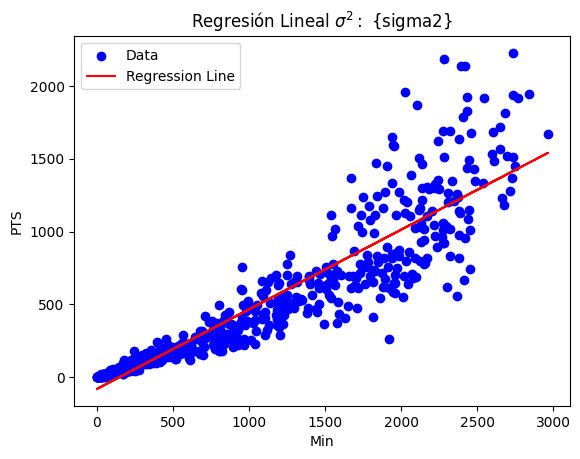

In [ ]:
try:
  x = df[x_column].astype(float)
  y = df[y_column].astype(float)

  B0, B1, y_estimados, SSE, sigma2, sigma = reg3(x, y)

  plt.scatter(x, y, color='blue', label='Data')
  plt.plot(x, y_estimados, color='red', label='Regression Line')
  plt.xlabel(x_column)
  plt.ylabel(y_column)
  plt.title('Regresión Lineal $\sigma^2:$ {sigma2}')
  plt.legend()
  plt.show()

except KeyError as e:
  print(f"Error: Column not found in DataFrame: {e}")
except Exception as e:
  print(f"Error processing data: {e}")

In [ ]:
  x = df[x_column].astype(float)
  y = df[y_column].astype(float)

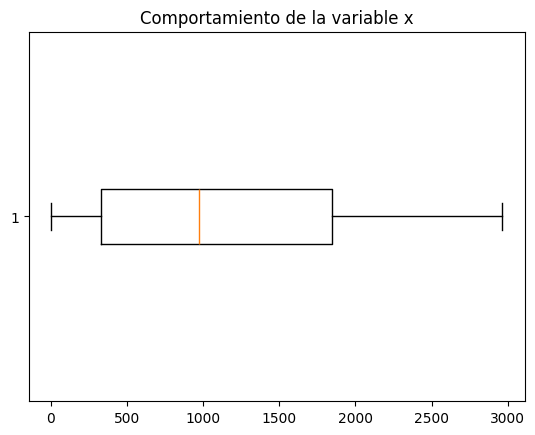

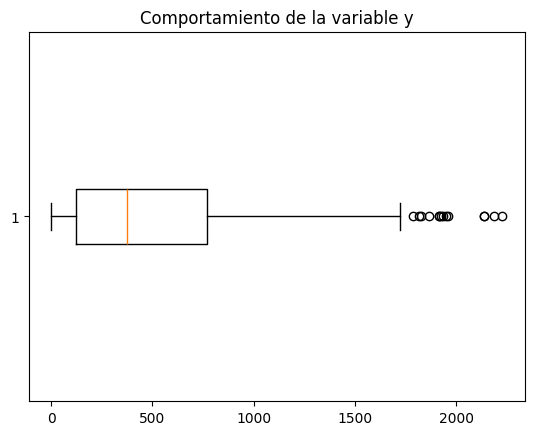

In [ ]:
plt.boxplot(x, vert=False)
plt.title('Comportamiento de la variable x')
plt.show()

plt.boxplot(y, vert=False) #important
plt.title('Comportamiento de la variable y')
plt.show()

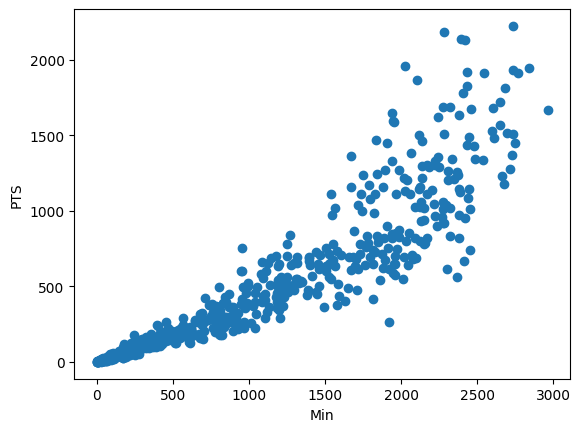

In [ ]:
plt.plot(x, y, 'o') #gráfica con las variables x y y.
plt.title('')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.show()

In [ ]:
def y_estimado(B0, B1, z):
  y_estimado = B0 + B1*z
  print('el valor estimado de y para',  z, 'es', y_estimado)
  return y_estimado

y_150 = y_estimado(B0, B1, 150)

el valor estimado de y para 150 es 2.362075990540916


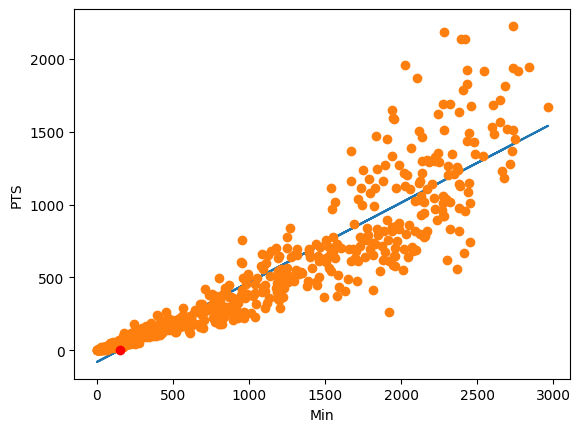

In [ ]:
plt.plot(x, y_estimados) #recta
plt.plot(x, y, 'o')
plt.plot(150, y_150, 'ro') #x=50
plt.title('')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.show()

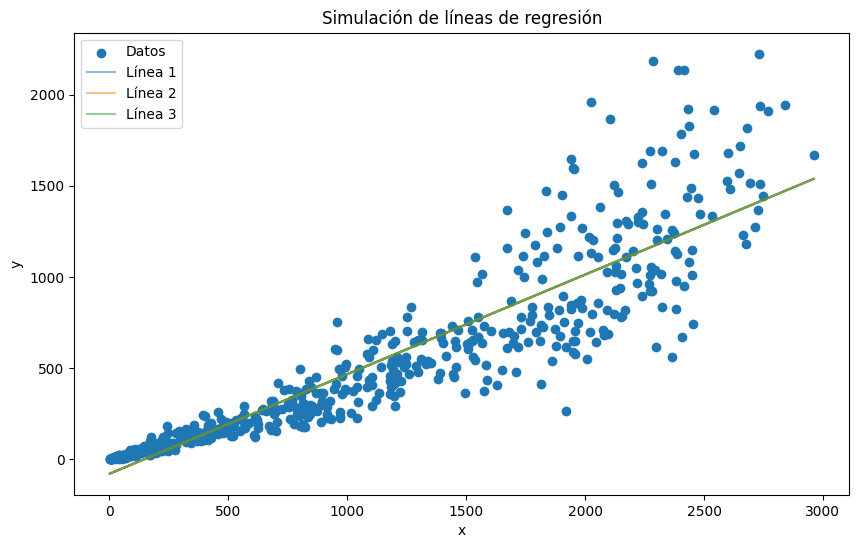

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
def simulate_regression_lines(x, y, num_simulations=3):

  n = len(x)
  slopes = []
  intercepts = []

  for _ in range(num_simulations):
    # Simular errores aleatorios
    errors = np.random.normal(loc=0, scale=1, size=n)
    y_simulated = y + errors

    # Ajustar la regresión lineal
    model = LinearRegression()
    model.fit(x.reshape(-1, 1), y_simulated)
    slopes.append(model.coef_[0])
    intercepts.append(model.intercept_)

  # Mostrar algunas líneas simuladas (opcional)
  plt.figure(figsize=(10, 6))
  plt.scatter(x, y, label="Datos")
  for i in range(min(num_simulations, 5)):  # Mostrar máximo 5 líneas
    y_simulated_line = intercepts[i] + slopes[i] * x
    plt.plot(x, y_simulated_line, alpha=0.5, label=f"Línea {i+1}")

  plt.xlabel("x")
  plt.ylabel("y")
  plt.title("Simulación de líneas de regresión")
  plt.legend()
  plt.show()

# Asegúrate de que 'x' e 'y' sean las variables que deseas usar
# Reemplaza 'x_column' e 'y_column' con los nombres de tus columnas
x_column = 'Min'
y_column = 'PTS'

try:
  x = df[x_column].astype(float).values
  y = df[y_column].astype(float).values

  # Llama a la función para simular las líneas de regresión
  simulate_regression_lines(x, y)

except KeyError as e:
  print(f"Error: Column not found in DataFrame: {e}")
except Exception as e:
  print(f"Error processing data: {e}")


In [ ]:
#@title Regresion completa
def regresion(x, y, alpha):
  # algunos valores
  n = np.size(x)
  sum_xy = np.sum(x * y)
  sum_x = np.sum(x)
  sum_y = np.sum(y)
  sum_x2 = np.sum(x ** 2)
  print('sum_x2 es', sum_x2)
  x_barra = np.sum(x) / n
  print('x_barra es', x_barra)
  y_barra = np.sum(y) / n
  SXY = sum_xy - (sum_y * sum(x)) / (n)
  SXX = sum_x2 - (sum_x ** 2) / (n)
  print('SXY es', SXY)
  print('SXX es', SXX)

  # coeficientes y recta
  B1 = SXY / SXX
  B0 = y_barra - B1 * x_barra
  y_estimados = B0 + B1 * x  # grafica
  print("Mi recta de regresion es", B0, '+', B1, 'x')
  print('B0 es', B0, 'y B1 es', B1)

  # Estimación sigma2
  SSE = np.sum(y**2) - B0*np.sum(y) - B1*np.sum(x*y)
  print('SSE es', SSE)
  sigma2 = SSE/(n-2)
  print('sigma2 es', sigma2)
  sigma = np.sqrt(sigma2)
  print('sigma es', sigma)

  #parámetros de B0, B1
  var_B1 = sigma2 / SXX
  print('var_B1 es', var_B1)
  var_B0 = (sigma2*sum(x**2)) / (n*SXX)
  print('var_B0 es', var_B0)
  std_B1 = np.sqrt(var_B1)
  print('std_B1 es', std_B1)
  std_B0 = np.sqrt(var_B0)
  print('std_B0 es', std_B0)
  cov_B1B0 = -(x_barra*sigma2)/(n*SXX)
  print('cov de B0 y B1 es', cov_B1B0)

  #intervalos de confianza
  v = n-2
  t_medio = stats.t.ppf(1-alpha/2, v)
  supB1 = B1 + t_medio*std_B1
  infB1 = B1 - t_medio*std_B1
  print('La cota superior para B1 es', supB1)
  print('La cota inferior para B1 es', infB1)
  y_estimadosSup = B0 + supB1*x
  y_estimadosInf = B0 + infB1*x


  return B0, B1, y_estimados, SSE, sigma2, sigma, SXX, var_B1, var_B0, std_B1, std_B0, cov_B1B0, supB1, infB1, y_estimadosSup, y_estimadosInf


sum_x2 es 1025121789.4099998
x_barra es 1103.617625231911
SXY es 201425220.44619662
SXX es 368634955.4025601
Mi recta de regresion es -79.59917761313636 + 0.5464083573578485 x
B0 es -79.59917761313636 y B1 es 0.5464083573578485
SSE es 23410936.020838737
sigma2 es 43595.784023908265
sigma es 208.79603450235416
var_B1 es 0.00011826275122580385
var_B0 es 224.92341958654126
std_B1 es 0.01087486787164809
std_B0 es 14.997447102308488
cov de B0 y B1 es -0.00024214630178332828
La cota superior para B1 es 0.5534092615069002
La cota inferior para B1 es 0.5394074532087969


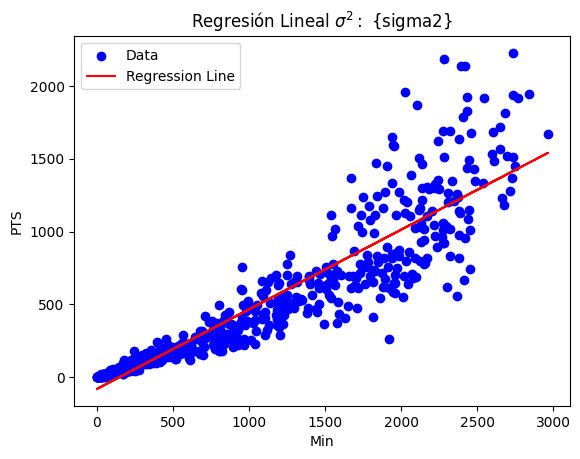

In [ ]:
try:
  x = df[x_column].astype(float)
  y = df[y_column].astype(float)

  B0, B1, y_estimados, SSE, sigma2, sigma, SXX, var_B1, var_B0, std_B1, std_B0, cov_B1B0, supB1, infB1, y_estimadosSup, y_estimadosInf = regresion(x, y, 0.52)

  plt.scatter(x, y, color='blue', label='Data')
  plt.plot(x, y_estimados, color='red', label='Regression Line')
  plt.xlabel(x_column)
  plt.ylabel(y_column)
  plt.title('Regresión Lineal $\sigma^2:$ {sigma2}')
  plt.legend()
  plt.show()

except KeyError as e:
  print(f"Error: Column not found in DataFrame: {e}")
except Exception as e:
  print(f"Error processing data: {e}")

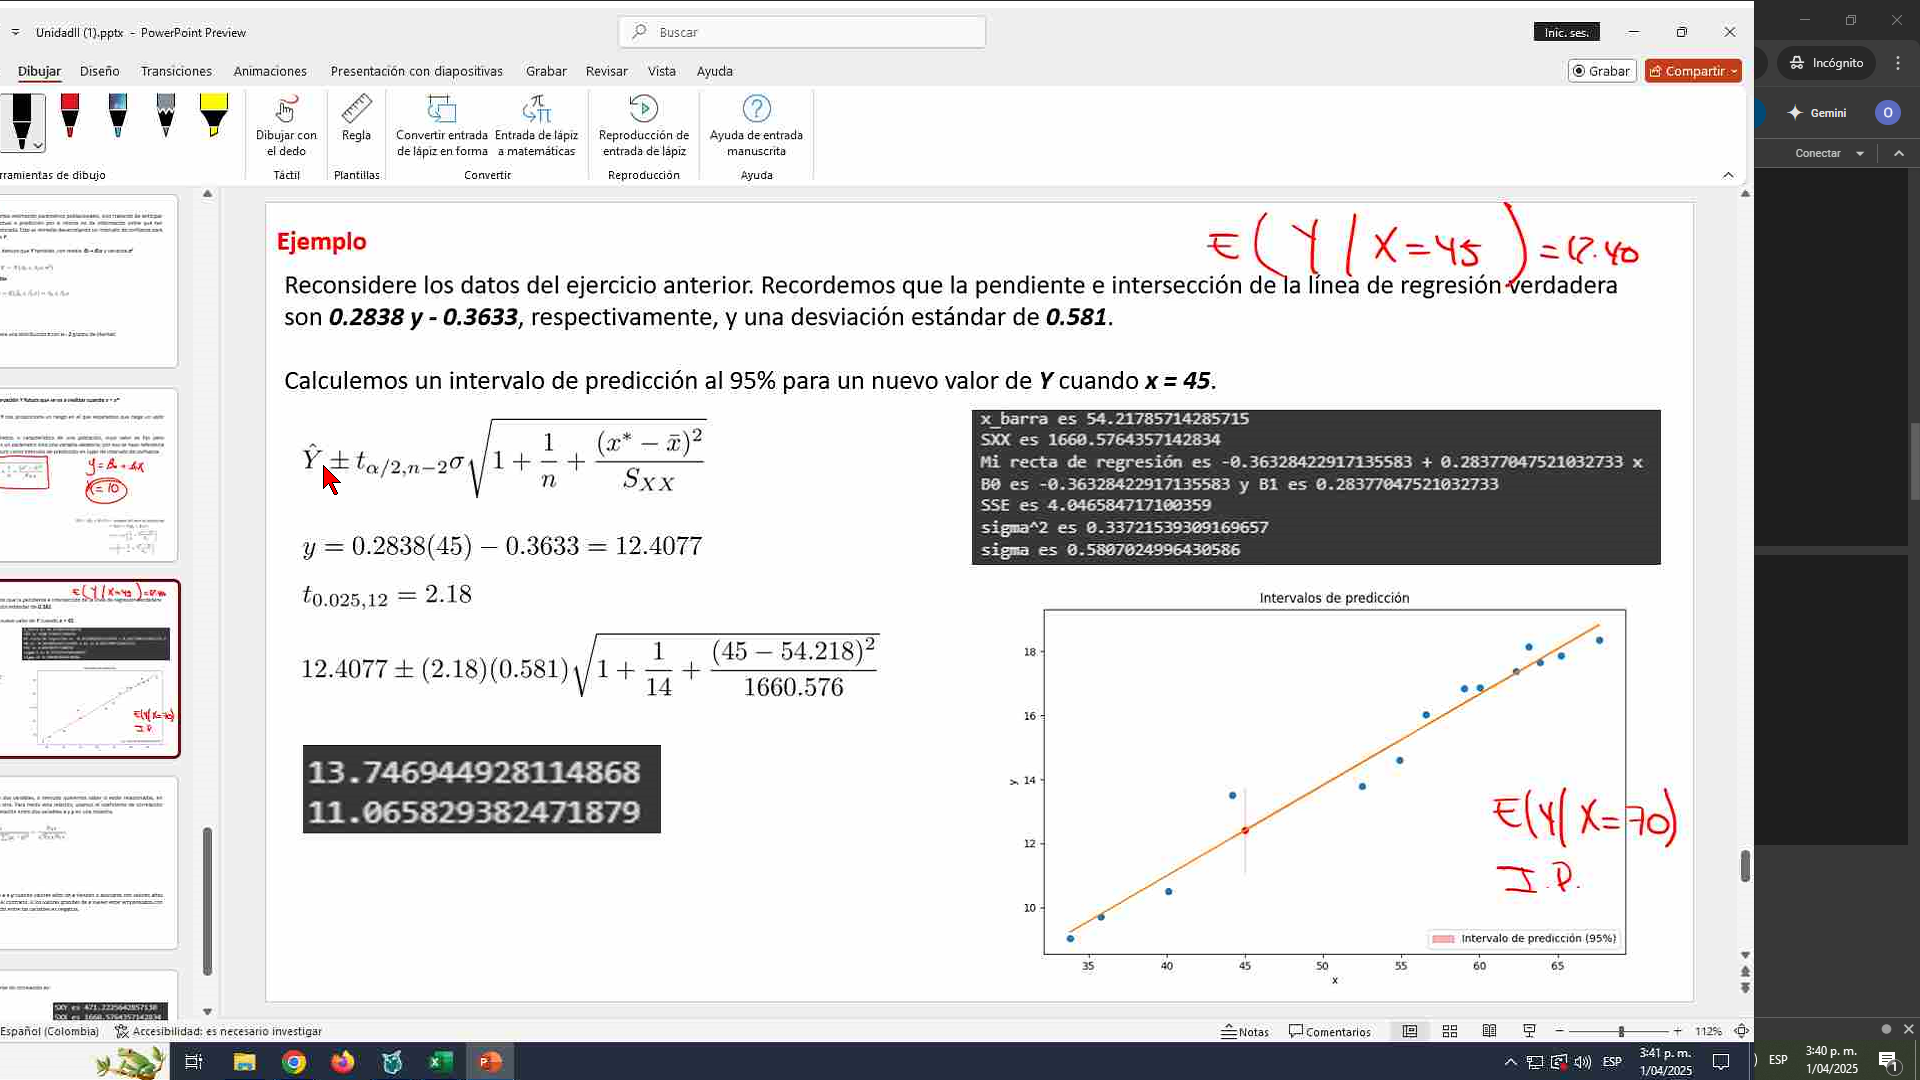